In [87]:
import pandas as pd

vendas =  pd.read_excel("/content/drive/MyDrive/base_dados.xlsx") #colocar o caminho dentro do parentese da base de dados que vou analisar
display(vendas)# mostra a base de dados

,Data,Loja,Produto,Quantidade
0,2017-05-27 00:00:00,Avenida 44,Short,2
1,2019-11-04 00:00:00,Avenida 44,Relógio,5
2,2019-06-18 00:00:00,Shopping Flamboyant,Calça,2
3,2020-04-18 00:00:00,Shopping Bougainville,Meia,1
4,2018-06-12 00:00:00,Avenida 85,Camisa,2
...,...,...,...,...
1048570,2010-05-29 00:00:00,Avenida 44,Chinelo,6
1048571,2015-02-18 00:00:00,Avenida 85,Calcinha,6
1048572,2014-01-05 00:00:00,Avenida 44,Camiseta,2
1048573,2019-08-02 00:00:00,Avenida Anhanguera,Meia,4


**Essa tabela que criei se chama dataframe (objeto do pandas) que possui linhas e colunas**

In [88]:
produtos = pd.read_excel("/content/drive/MyDrive/base_dados.xlsx", 
                         sheet_name="Produtos") #o parametro sheet_name pega o nome da outra planilha e coloca em uma variavel
produtos

,Produto,Valor Unitário (US$),Custo Unitário (US$)
0,Short,12,3.26
1,Relógio,45,11.99
2,Calça,30,7.46
3,Meia,5,1.53
4,Camisa,25,8.78
5,Tênis,35,9.89
6,Chinelo,8,2.58
7,Camiseta,30,7.27
8,Sapato,40,18.39
9,Bermuda,15,3.91


In [89]:
emails = pd.read_excel("/content/drive/MyDrive/base_dados.xlsx", 
                         sheet_name="E-mails") #o parametro sheet_name pega o nome da outra planilha e coloca em uma variavel
emails

,Loja,E-mail
0,Avenida 44,ff.python1@gmail.com
1,Avenida 85,ff.python2@gmail.com
2,Avenida Anhanguera,ff.python5@gmail.com
3,Goiânia Shopping,ff.python6@gmail.com
4,Shopping Passeio das Águas,ff.python7@gmail.com
5,Shopping Flamboyant,ff.python8@gmail.com
6,Shopping Bougainville,ff.python9@gmail.com


**com excel posso criar planilhas dentro de planilha e com sheet_name consigo navegar nessas planilhas**

In [90]:
vendas.info() #info() traz informaçoes sobre o objeto


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Data        1048572 non-null  object
 1   Loja        1048573 non-null  object
 2   Produto     1048562 non-null  object
 3   Quantidade  1048575 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 32.0+ MB


Problemas:
1) ha valores nulos
2) data é visto como um objeto (string) devo modificar isso

In [91]:
vendas.describe() #retorna estatisticas, porem sem significado para mim

,Quantidade
count,1.048575e+06
mean,2.868375e+00
std,1.597391e+00
min,1.000000e+00
25%,1.000000e+00
50%,3.000000e+00
75%,4.000000e+00
max,7.000000e+00


In [92]:
vendas["Data"] = pd.to_datetime(vendas["Data"], errors = 'coerce') #converte um objeto string em um objeto horas do pandas
vendas = vendas.dropna() #retorna o dataframe sem todas as linhas vazias (sem modificar o original)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048513 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Data        1048513 non-null  datetime64[ns]
 1   Loja        1048513 non-null  object        
 2   Produto     1048513 non-null  object        
 3   Quantidade  1048513 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.0+ MB


v

In [93]:
produtos["Lucro"] = produtos["Valor Unitário (US$)"] - produtos["Custo Unitário (US$)"] #crio a coluna "Lucro" no df produtos
produtos

,Produto,Valor Unitário (US$),Custo Unitário (US$),Lucro
0,Short,12,3.26,8.74
1,Relógio,45,11.99,33.01
2,Calça,30,7.46,22.54
3,Meia,5,1.53,3.47
4,Camisa,25,8.78,16.22
5,Tênis,35,9.89,25.11
6,Chinelo,8,2.58,5.42
7,Camiseta,30,7.27,22.73
8,Sapato,40,18.39,21.61
9,Bermuda,15,3.91,11.09


In [94]:
venda = vendas.merge(produtos) #junta 2 bases de dados
venda

,Data,Loja,Produto,Quantidade,Valor Unitário (US$),Custo Unitário (US$),Lucro
0,2017-05-27,Avenida 44,Short,2,12,3.26,8.74
1,2015-06-07,Avenida Anhanguera,Short,1,12,3.26,8.74
2,2018-03-23,Shopping Passeio das Águas,Short,5,12,3.26,8.74
3,2016-03-18,Avenida 44,Short,2,12,3.26,8.74
4,2013-09-02,Avenida 44,Short,5,12,3.26,8.74
...,...,...,...,...,...,...,...
1048508,2013-12-22,Shopping Flamboyant,Cueca,3,5,1.69,3.31
1048509,2017-07-16,Goiânia Shopping,Cueca,1,5,1.69,3.31
1048510,2017-10-26,Avenida 44,Cueca,5,5,1.69,3.31
1048511,2019-01-21,Avenida Anhanguera,Cueca,4,5,1.69,3.31


In [95]:
venda["Valor Unitário (US$)"] = venda["Valor Unitário (US$)"] * venda["Quantidade"] #calcula o valor total (so nao mudei o nome)
venda["Custo Unitário (US$)"] = venda["Custo Unitário (US$)"] * venda["Quantidade"] #calcula o custo total (so nao mudei o nome)
venda["Lucro"] = venda["Lucro"] * venda["Quantidade"] #calcula o lucro total (so nao mudei o nome)

venda = venda.rename(columns={"Valor Unitário (US$)":"Valor Total", 
                              "Custo Unitário (US$)":"Custo Total"}) #renomeio as colunas de acordo com o meu problema
venda

,Data,Loja,Produto,Quantidade,Valor Total,Custo Total,Lucro
0,2017-05-27,Avenida 44,Short,2,24,6.52,17.48
1,2015-06-07,Avenida Anhanguera,Short,1,12,3.26,8.74
2,2018-03-23,Shopping Passeio das Águas,Short,5,60,16.30,43.70
3,2016-03-18,Avenida 44,Short,2,24,6.52,17.48
4,2013-09-02,Avenida 44,Short,5,60,16.30,43.70
...,...,...,...,...,...,...,...
1048508,2013-12-22,Shopping Flamboyant,Cueca,3,15,5.07,9.93
1048509,2017-07-16,Goiânia Shopping,Cueca,1,5,1.69,3.31
1048510,2017-10-26,Avenida 44,Cueca,5,25,8.45,16.55
1048511,2019-01-21,Avenida Anhanguera,Cueca,4,20,6.76,13.24


#Web scrpping 


**é pegar dados da internet**


In [96]:
import requests as r
from bs4 import BeautifulSoup #nao importar toda a biblioteca é uma boa pratica

link = "https://br.investing.com/currencies/usd-brl"
pagina = r.get(link) #acesso o site pelo link
sopa = BeautifulSoup(pagina.content, "html.parser") #crio a sopa, ou seja dou inicio ao web scrapping

resposta = sopa.find('span', class_='text-2xl') #vou la no codigo da pagina e pego o codigo do dado que quero ver 
#dentro de <span> na pagina que estou pegando o dado esta o valor do dolar e o valor class que sao parametros para fazer web scraping

print(resposta) #quero pegar o valor do dolar
print(resposta.getText()) #pego apenas o valor do dolar na forma de string
dolar = float(resposta.getText().replace(',','.')) #substituo a virgula pelo ponto e converto em float
dolar

<span class="text-2xl" data-test="instrument-price-last">5,1721</span>
5,1721


5.1721

In [97]:
venda[['Valor Total',	"Custo Total",	'Lucro']] = venda[['Valor Total',	"Custo Total",	'Lucro']] * dolar #visualiso apenas 3 colunas e multiplico pelo dolar

In [98]:
venda

,Data,Loja,Produto,Quantidade,Valor Total,Custo Total,Lucro
0,2017-05-27,Avenida 44,Short,2,124.1304,33.722092,90.408308
1,2015-06-07,Avenida Anhanguera,Short,1,62.0652,16.861046,45.204154
2,2018-03-23,Shopping Passeio das Águas,Short,5,310.3260,84.305230,226.020770
3,2016-03-18,Avenida 44,Short,2,124.1304,33.722092,90.408308
4,2013-09-02,Avenida 44,Short,5,310.3260,84.305230,226.020770
...,...,...,...,...,...,...,...
1048508,2013-12-22,Shopping Flamboyant,Cueca,3,77.5815,26.222547,51.358953
1048509,2017-07-16,Goiânia Shopping,Cueca,1,25.8605,8.740849,17.119651
1048510,2017-10-26,Avenida 44,Cueca,5,129.3025,43.704245,85.598255
1048511,2019-01-21,Avenida Anhanguera,Cueca,4,103.4420,34.963396,68.478604


quero achar agora o valor medio do lucro por produto (ticket medio)

In [99]:
venda_loja = venda.groupby('Loja') #groupby é um objeto que agrupa pelo tipo da loja
venda_loja= venda_loja.sum()
venda_loja

,Quantidade,Valor Total,Custo Total,Lucro
Loja,,,,
Avenida 44,684989,8.177636e+07,2.413982e+07,5.763653e+07
Avenida 85,237822,2.652992e+07,7.980427e+06,1.854950e+07
Avenida Anhanguera,413549,4.834249e+07,1.452730e+07,3.381519e+07
Goiânia Shopping,463001,4.965506e+07,1.506262e+07,3.459244e+07
Shopping Bougainville,146685,1.616102e+07,4.860906e+06,1.130011e+07
Shopping Flamboyant,576562,6.725664e+07,2.063182e+07,4.662483e+07
Shopping Passeio das Águas,484902,5.289585e+07,1.609799e+07,3.679787e+07


In [100]:
venda_loja['Ticket Medio'] = venda_loja['Lucro']/venda_loja['Quantidade']
venda_loja

,Quantidade,Valor Total,Custo Total,Lucro,Ticket Medio
Loja,,,,,
Avenida 44,684989,8.177636e+07,2.413982e+07,5.763653e+07,84.142277
Avenida 85,237822,2.652992e+07,7.980427e+06,1.854950e+07,77.997403
Avenida Anhanguera,413549,4.834249e+07,1.452730e+07,3.381519e+07,81.768283
Goiânia Shopping,463001,4.965506e+07,1.506262e+07,3.459244e+07,74.713538
Shopping Bougainville,146685,1.616102e+07,4.860906e+06,1.130011e+07,77.036587
Shopping Flamboyant,576562,6.725664e+07,2.063182e+07,4.662483e+07,80.866980
Shopping Passeio das Águas,484902,5.289585e+07,1.609799e+07,3.679787e+07,75.887225


**Quero achar o produto mais vendido por loja**







In [101]:
prod = []

for loja in venda_loja.index: #loja assume o valor 
  lojinha = venda.loc[venda['Loja']==loja] #seleciono todas as lojas iguais a "loja" em "venda" (query)
  lojinha = lojinha.groupby("Produto").sum() #somo todas as quantidades em cada coluna, mas me interesso apenas na coluna quantidade
  lojinha = lojinha.loc[lojinha['Quantidade']==lojinha['Quantidade'].max()]
  prod.append(lojinha.index[0])
venda_loja['Produto mais vendido']= prod
venda_loja


,Quantidade,Valor Total,Custo Total,Lucro,Ticket Medio,Produto mais vendido
Loja,,,,,,
Avenida 44,684989,8.177636e+07,2.413982e+07,5.763653e+07,84.142277,Camiseta
Avenida 85,237822,2.652992e+07,7.980427e+06,1.854950e+07,77.997403,Camisa
Avenida Anhanguera,413549,4.834249e+07,1.452730e+07,3.381519e+07,81.768283,Camisa
Goiânia Shopping,463001,4.965506e+07,1.506262e+07,3.459244e+07,74.713538,Camisa
Shopping Bougainville,146685,1.616102e+07,4.860906e+06,1.130011e+07,77.036587,Camisa
Shopping Flamboyant,576562,6.725664e+07,2.063182e+07,4.662483e+07,80.866980,Camisa
Shopping Passeio das Águas,484902,5.289585e+07,1.609799e+07,3.679787e+07,75.887225,Camisa


#Criando graficos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Quantidade,Valor Total,Custo Total,Lucro,Ticket Medio,Produto mais vendido,Graficos
Loja,,,,,,,
Avenida 44,684989,8.177636e+07,2.413982e+07,5.763653e+07,84.142277,Camiseta,Figure(864x504)
Avenida 85,237822,2.652992e+07,7.980427e+06,1.854950e+07,77.997403,Camisa,Figure(864x504)
Avenida Anhanguera,413549,4.834249e+07,1.452730e+07,3.381519e+07,81.768283,Camisa,Figure(864x504)
Goiânia Shopping,463001,4.965506e+07,1.506262e+07,3.459244e+07,74.713538,Camisa,Figure(864x504)
Shopping Bougainville,146685,1.616102e+07,4.860906e+06,1.130011e+07,77.036587,Camisa,Figure(864x504)
Shopping Flamboyant,576562,6.725664e+07,2.063182e+07,4.662483e+07,80.866980,Camisa,Figure(864x504)
Shopping Passeio das Águas,484902,5.289585e+07,1.609799e+07,3.679787e+07,75.887225,Camisa,Figure(864x504)


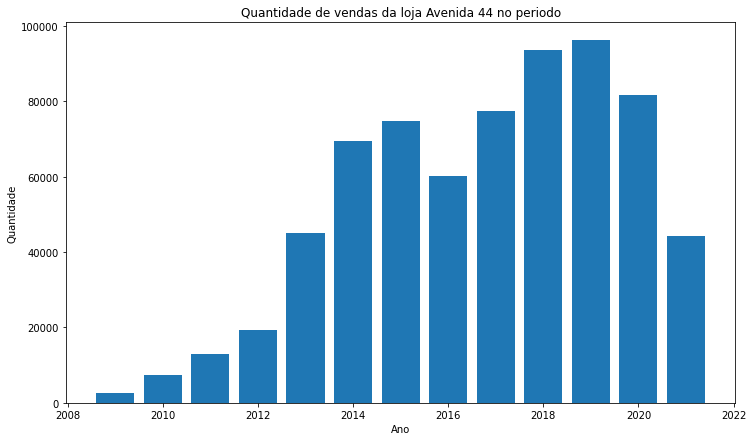

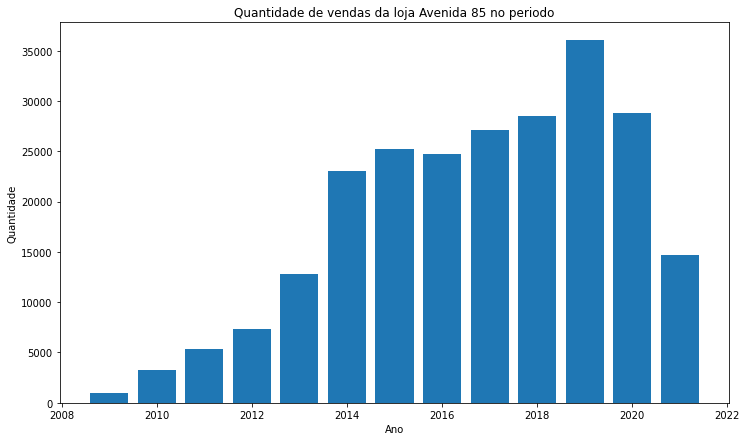

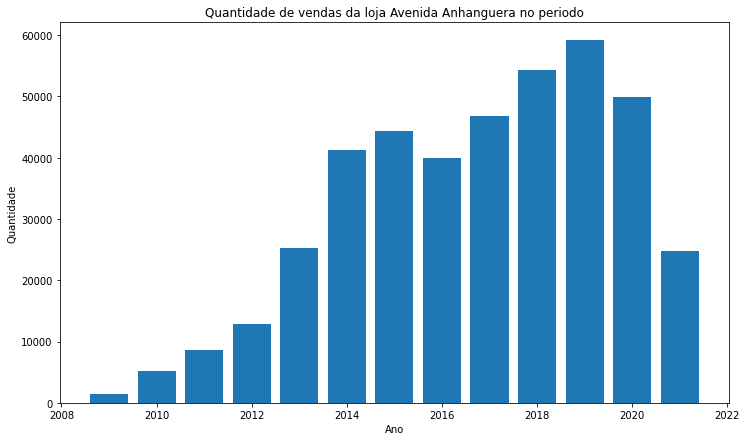

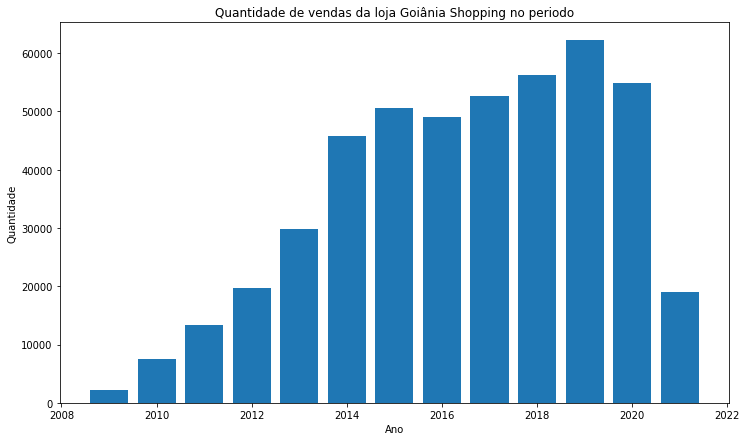

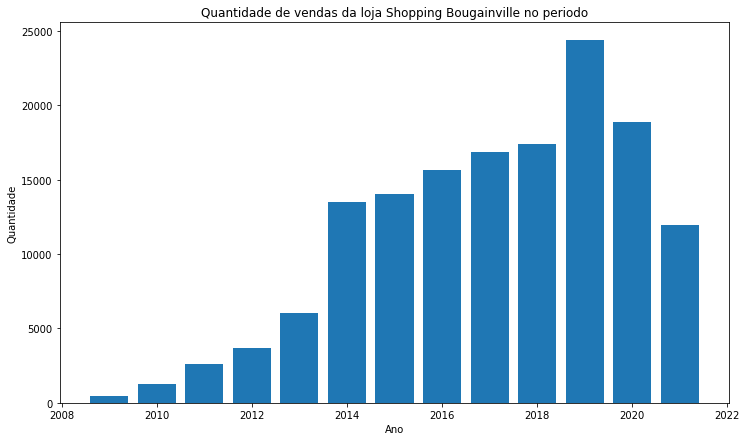

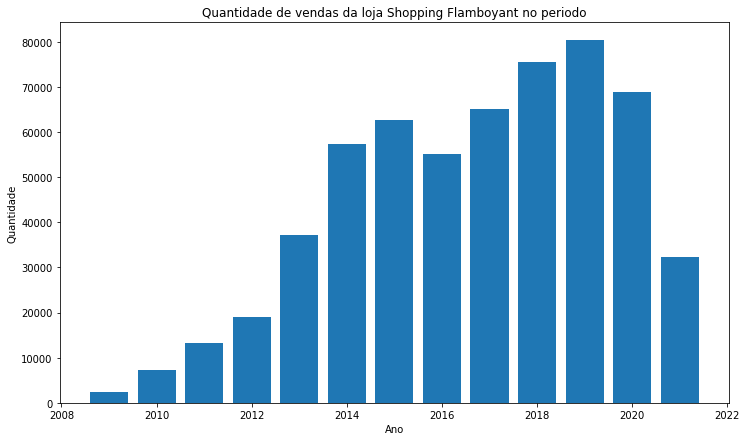

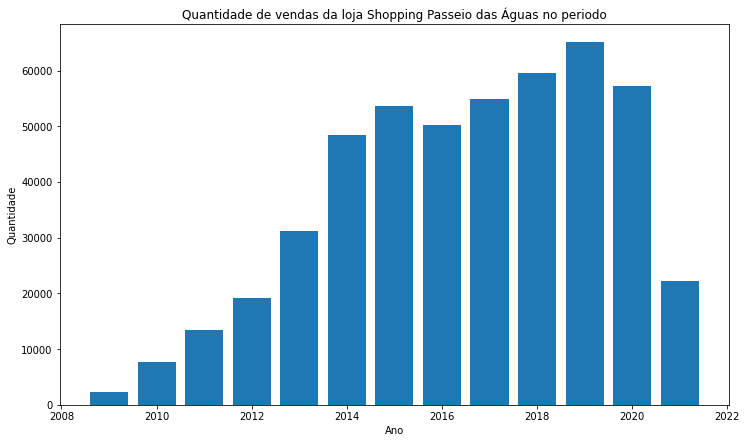

In [102]:
import matplotlib.pyplot as plt

graf = [] #lista que recebe todos os graficos
for loja in venda_loja.index:
  lojinha =  venda.loc[venda['Loja']== loja] #seleciono todas as lojas iguais a "loja" em "venda" (query)
  lojinha['Ano'] = lojinha['Data'].dt.year #pega as datas apenas pelo ano ignorando os dias
  lojinha = lojinha.groupby('Ano').sum() #agrupa pelo ano e soma
  fig = plt.figure(figsize=(12, 7))#figsize é em polegadas
  plt.bar(x=lojinha.index,height=lojinha['Quantidade']) 
  plt.title(f'Quantidade de vendas da loja {loja} no periodo')
  plt.xlabel('Ano')
  plt.ylabel('Quantidade')
  graf.append(fig)

venda_loja['Graficos']= graf
venda_loja


In [103]:
def formata_moeda(num): #formata o faturamento
  num = f'R$ {num:,.2f}' #limita para 2 casas decimais o float e coloca virgula a cada 3 casas decimais
  num = num.replace(',',';') #troca a virgula pelo ponto e o ponto pela virgula
  num = num.replace('.',',') #troca a virgula pelo ponto e o ponto pela virgula
  num = num.replace(';','.') #troca a virgula pelo ponto e o ponto pela virgula
  return num

In [104]:
ranking =  venda_loja[['Quantidade', 'Lucro']]
ranking = ranking.rename(columns={'Lucro':'Faturamento'})
ranking['Faturamento'] = [formata_moeda(valor) for valor in ranking['Faturamento']]
ranking = ranking.sort_values('Quantidade', ascending=False)


#Mandando emails

In [105]:
pip install redmail

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
from redmail import EmailSender
from tqdm import tqdm

remetente = 'polipython@gmail.com'
senha = 'jtvujhxejnkeuztd'

email = EmailSender(host='smtp.gmail.com',
                    port=587,
                    username= remetente,
                    password= senha)

corpo = '''
    <h1>Resultados da loja {{ loja }}</h1>

    <p>Resumo dos resultados para a loja <i>{{ loja }}</i> da companhia:</p>

    <ul>
        <li>Faturamento total de <b>{{ faturamento }}</b></li>
        <li><b>{{ quantidade }}</b> peças vendidas</li>
        <li>Ticket médio de <b>{{ ticket_medio }}</b></li>
        <li><b>{{ produto_mais_vendido }}</b> foi o produto mais vendido</li>
    </ul>

    <p>Segue o ranking de vendas de todas as lojas:</p>

    {{ ranking }}

    <p>E os resultados da loja {{ loja }} ao longo do período:</p>

    {{ grafico }}

    <p>Att.</p>
    '''




  

In [107]:
for i, loja in tqdm(enumerate(venda_loja.index)):
    destinatario = emails['E-mail'][i]
    assunto = f'Resultados da loja {loja}'
    grafico = venda_loja['Graficos'][i]
    quantidade = venda_loja['Quantidade'][i]
    faturamento = formata_moeda(venda_loja['Lucro'][i])
    ticket_medio = formata_moeda(venda_loja['Ticket Medio'][i])
    produto_mais_vendido = venda_loja['Produto mais vendido'][i]
    
    

    email.send(
        subject = assunto,
        sender = remetente,
        receivers=destinatario,
        html=corpo,
        body_params={'loja': loja,
                    'faturamento': faturamento,
                    'quantidade': quantidade,
                    'ticket_medio': ticket_medio,
                    'produto_mais_vendido': produto_mais_vendido},
        body_images={'grafico': grafico},
        body_tables={'ranking': ranking}
    )

7it [00:10,  1.56s/it]
